# Time Series Visualizer for FCC

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mpl_dates
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

#filter data
df = df[
    (df.value >= df.value.quantile(0.025)) &
    (df.value <= df.value.quantile(0.975)) 
         ]
df.head()


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


## Line Plot

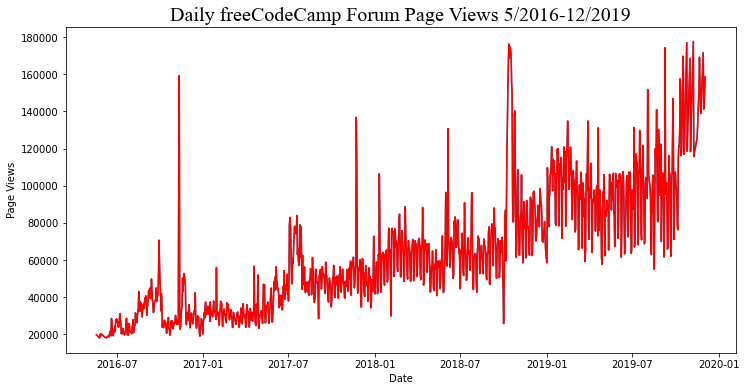

In [159]:
# df['date'] = pd.to_datetime(df['date'])
# df.sort_values('date', inplace=True)

x = df.index
y = df.value

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y)

ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019", fontdict={'fontname':'times new roman', 'fontsize':20})
ax.set_ylabel('Page Views')
ax.set_xlabel('Date')

ax.plot_date(x, y, color='red',marker=None,linestyle='solid')



plt.show()

## Bar Plot

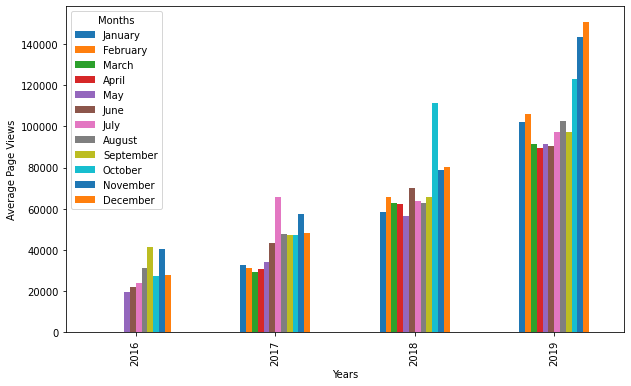

In [162]:
df1=df.copy()
df1['month'] = df1.index.strftime('%B')
cats = ['January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November',
        'December'  
        ]
df1.month = pd.Categorical(df1.month, categories=cats, ordered=True)
df1['year'] = df1.index.year

df_bar = df1.groupby(['year', 'month'], sort=False)['value'].mean()
df_bar = df_bar.unstack()
df_bar.plot.bar(figsize=(10,6), ylabel='Average Page Views', xlabel='Years')
plt.legend(title="Months")

plt.show()

## Box Plot

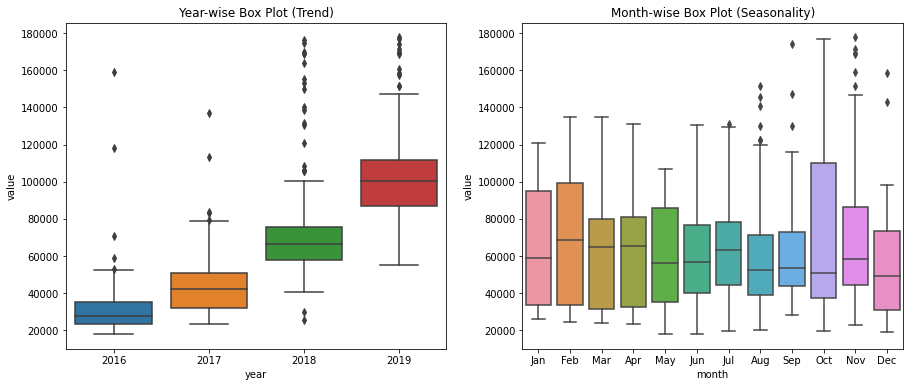

In [157]:
# Prepare data for box plots (this part is done!) 
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
# above code is done by freeCodeCamp
cat = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
        'Dec'  
        ]
df_box.month = pd.Categorical(df_box.month,categories=cat, ordered=True)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.boxplot(ax=ax1,x="year", y="value", data=df_box)
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')


sns.boxplot(ax=ax2,x="month", y="value", data=df_box)
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')



plt.show()


